In [172]:
import os
import numpy as np
from PIL import Image
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model
from sklearn.model_selection import train_test_split
from random import *
import PIL
from PIL import Image

# Algo Génétique

In [159]:
# Mutation function
def mutation(P, Tm):
    n, m, o,q = P.shape
    P_copy = np.copy(P)
    for i in range(n):
        for j in range(m):
            for k in range(o):
                for l in range(q):
                    p = np.random.random()
                    if p < Tm:
                        P_copy[i, j,k,l] = (0.5) * P[i, j,k,l]
    return P_copy


In [160]:
def crossing_over_temp(P, Tc):
    new_P = np.copy(P)
    liste=[]

    for i in range(0,len(new_P)):
        if random() < Tc:
            indc_im = randint(0, new_P.shape[0]-1) 
            posc_x = randint(0, new_P.shape[1]-1)
            posc_y = randint(0, new_P.shape[2]-1)
            posc_z= randint(0, new_P.shape[3]-1)
            tmp = new_P[i,posc_x:new_P.shape[1], posc_y:new_P.shape[2], posc_z:new_P.shape[3]]
            new_P[i,posc_x:new_P.shape[1], posc_y:new_P.shape[2], posc_z:new_P.shape[3]] = new_P[indc_im,posc_x:new_P.shape[1], posc_y:new_P.shape[2], posc_z:new_P.shape[3]]
            new_P[indc_im,posc_x:new_P.shape[1], posc_y:new_P.shape[2], posc_z:new_P.shape[3]] = tmp
            liste.append(indc_im)
          
    return new_P, liste

In [165]:
X_encoded=encoder.predict(X_test)
X_encoded
X_mutation=mutation(X_encoded,0.005)

13/13 [==============================] - 1s 44ms/step


In [166]:
X_cross,liste = crossing_over_temp(X_mutation, 1)

In [167]:
X_cross.shape

(400, 29, 29, 32)

13/13 [==============================] - 1s 46ms/step


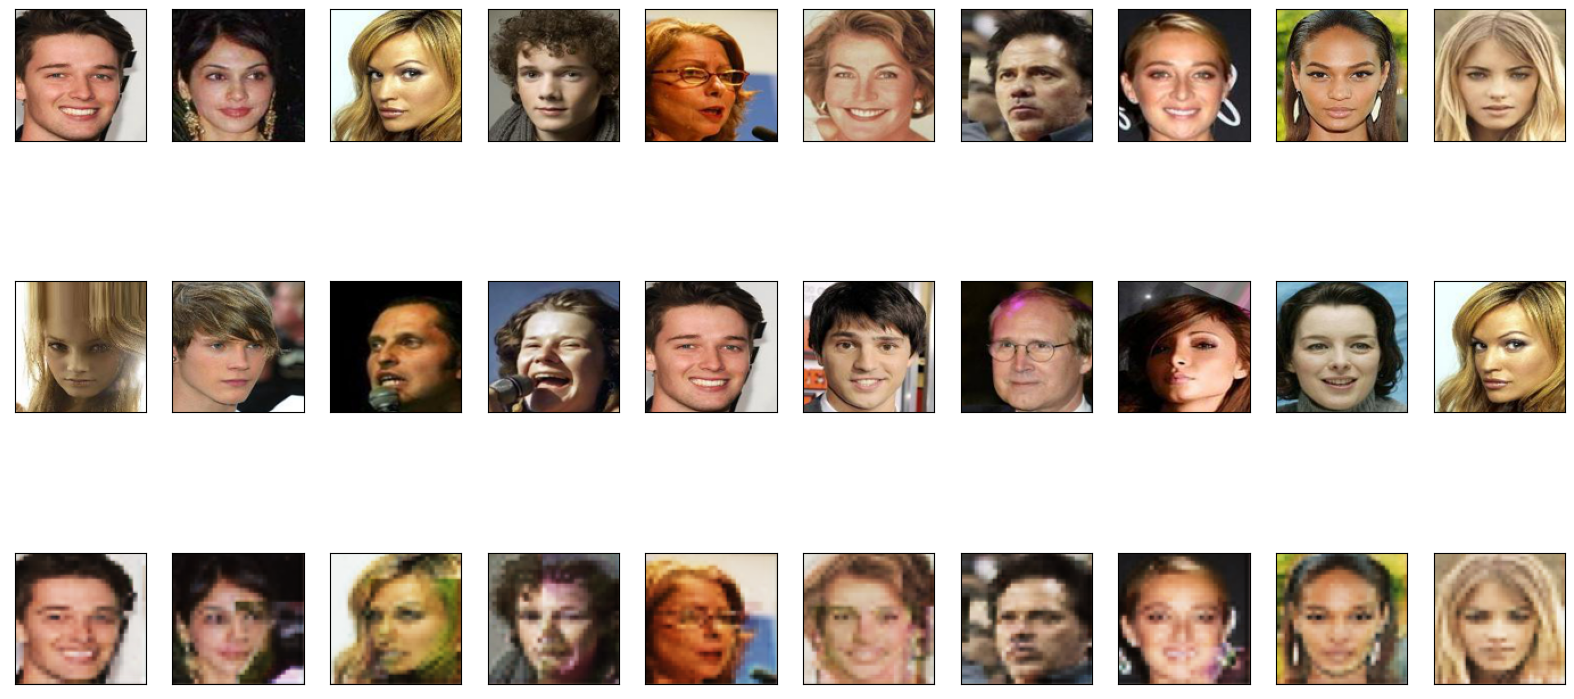

In [168]:
plot_image_reconstruction_crossing(decoder,X_test,X_cross,liste,lenght, height) #plot le résultat de l'encodeur pas séparé